## Problem Statement:

Predicting Red Wine Quality Using Machine Learning

The goal of this project is to develop a predictive model that can accurately determine the quality of red wine based on its physicochemical properties.
The dataset contains various features such as acidity levels, residual sugar, alcohol content,and more, associated with different red wine samples.
The quality of the wine is represented by a numerical rating, ranging from 0 to 10.

The primary objective is to design and train a machine learning model capable of accurately predicting the wine quality based on these features.
This predictive model will aid in quality control processes within the wine production industry and help winemakers enhance the overall quality of their products.

In [1]:
# importing requiring libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv(r"C:\Users\Maruthipadala\Downloads\archive (5).zip")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
df['pH'].value_counts()

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
3.75     1
2.74     1
3.70     1
3.85     1
2.90     1
Name: pH, Length: 89, dtype: int64

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.duplicated().sum()

240

In [9]:
df.shape

(1599, 12)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

## EDA

<AxesSubplot:>

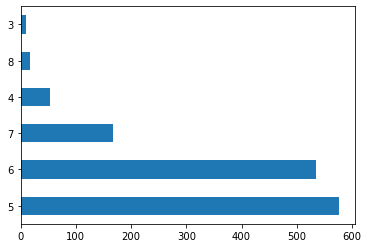

In [12]:
df['quality'].value_counts().plot(kind='barh')

<AxesSubplot:xlabel='quality', ylabel='pH'>

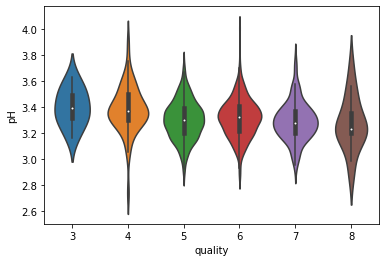

In [13]:
sns.violinplot(df['quality'],df['pH'])

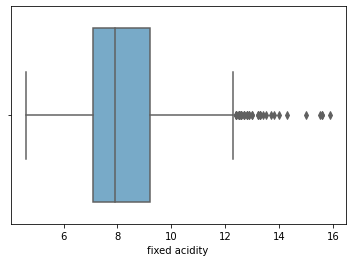

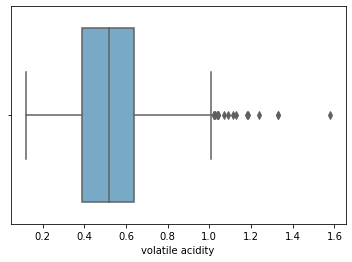

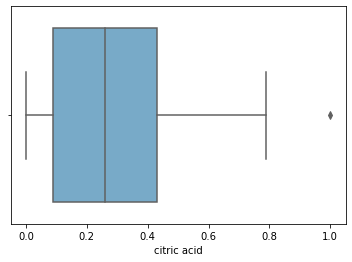

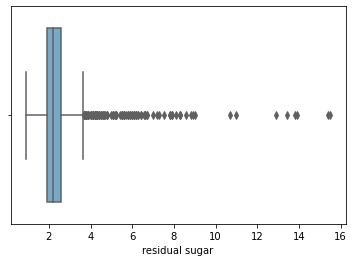

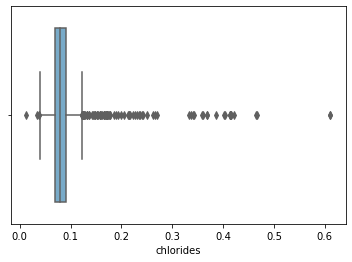

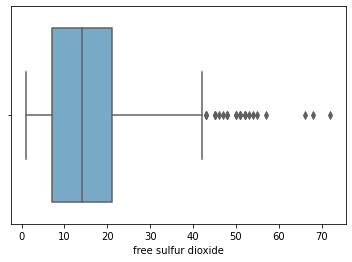

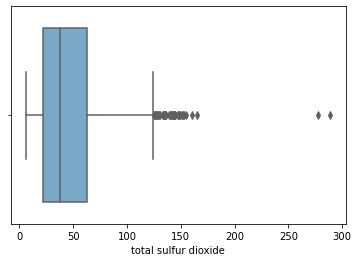

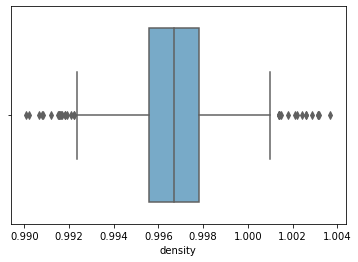

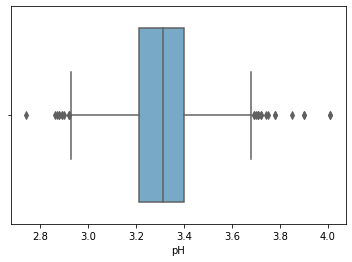

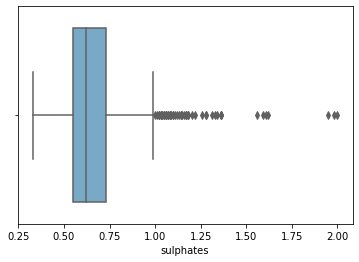

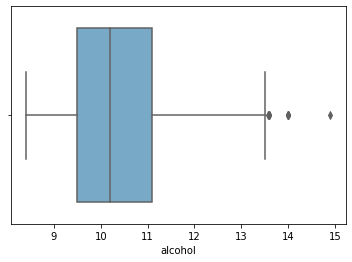

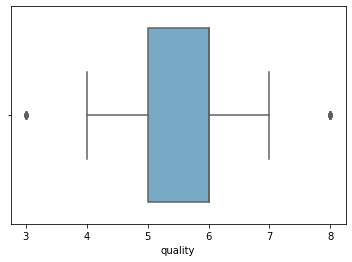

In [14]:

for j in df:
    sns.boxplot(df[j],palette = 'Blues',hue = df['quality'])
    plt.show()

In [15]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


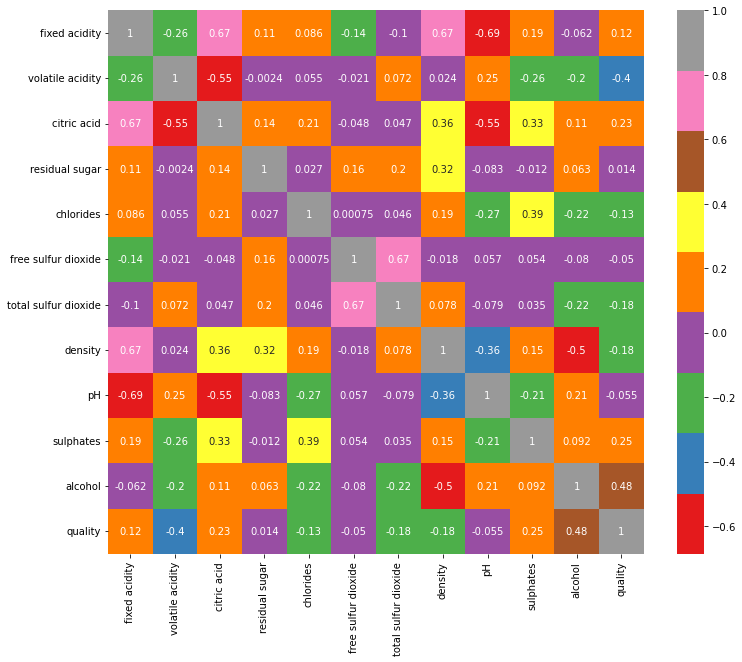

In [16]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),annot=True,cmap='Set1')
plt.show()

In [17]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:xlabel='quality', ylabel='count'>

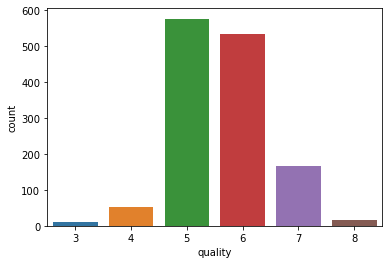

In [18]:
sns.countplot(df['quality'])

In [19]:
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [20]:
df['good quality'] = np.where(df['quality'] >6, 1, 0)


<AxesSubplot:xlabel='good quality', ylabel='count'>

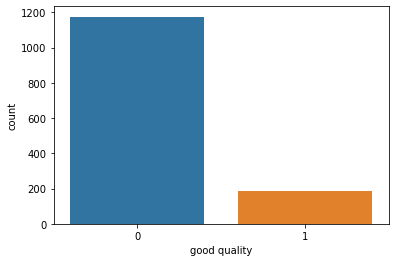

In [21]:
sns.countplot(df['good quality'])

In [22]:
df['good quality'].value_counts()

0    1175
1     184
Name: good quality, dtype: int64

In [23]:
df.drop(columns=['quality'],axis=1,inplace=True)

In [24]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x=df.drop(columns='good quality',axis=1)
y=df['good quality']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [28]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1031,7.3,0.550,0.01,1.8,0.093,9.0,15.0,0.99514,3.35,0.58,11.0
844,9.9,0.250,0.46,1.7,0.062,26.0,42.0,0.99590,3.18,0.83,10.6
38,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.8
1384,7.1,0.755,0.15,1.8,0.107,20.0,84.0,0.99593,3.19,0.50,9.5
611,13.2,0.380,0.55,2.7,0.081,5.0,16.0,1.00060,2.98,0.54,9.4


In [29]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1087, 11) (1087,)
(272, 11) (272,)


## Before Standardizing  the Data
###  -->  steps involved 
#### ** Building the models
#### ** finding the best model Accuracy Score
#### ** Algorithams used  --> Decision Tree,Logistic Regression ,KNN,SVC,Random Forest


In [30]:
from sklearn.metrics import accuracy_score
# Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier
dr=DecisionTreeClassifier()
dr.fit(x_train,y_train)
y_pred_d=dr.predict(x_test)
accuracydr = accuracy_score(y_test, y_pred_d)
print('Decision tree Classifier:',accuracydr)

Decision tree Classifier: 0.8566176470588235


In [31]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
lr_score=accuracy_score(y_test,y_pred)
print('LogisticRegression:',lr_score)



LogisticRegression: 0.8786764705882353


In [32]:
from sklearn.neighbors import KNeighborsClassifier
dknn=KNeighborsClassifier()
dknn.fit(x_train,y_train)
y_pred_d=dknn.predict(x_test)
accuracyknn = accuracy_score(y_test, y_pred_d)
accuracyknn
print('KNeighborsClassifier:',accuracyknn)

KNeighborsClassifier: 0.8823529411764706


In [33]:
# Support Vector Classifier
from sklearn.svm import SVC
ds=SVC()
ds.fit(x_train,y_train)
y_pred_d=ds.predict(x_test)
accuracyds = accuracy_score(y_test, y_pred_d)
print('Support Vector Classifier:',accuracyds)


Support Vector Classifier: 0.8860294117647058


In [34]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
dRF=RandomForestClassifier()
dRF.fit(x_train,y_train)
y_pred_d=dRF.predict(x_test)
accuracydRF = accuracy_score(y_test, y_pred_d)
print('RandomForestClassifier:',accuracydRF)

RandomForestClassifier: 0.8970588235294118


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

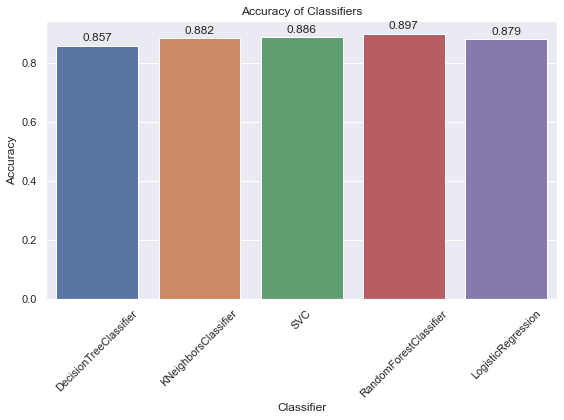

In [36]:
# Classifier names

x = ['DecisionTreeClassifier', 'KNeighborsClassifier', 'SVC', 'RandomForestClassifier', 'LogisticRegression']

# Corresponding accuracies
y = [accuracydr, accuracyknn, accuracyds, accuracydRF, lr_score]

# Plotting the bar plot with values on top
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=x, y=y)
# Displaying the values on top of the bars
for i, v in enumerate(y):
    ax.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classifiers')
plt.tight_layout()
plt.show()


### Random forest giving the best Accuracy value with 0.89

### ----------------------------------------------------------------------------------------------------------------------

## Standardizing the Data 
#### --> all the data converting into the range between -3 to 3 to easily simplyfing the data

In [37]:
from sklearn.preprocessing import StandardScaler
# standardization
sc=StandardScaler()

In [38]:
x_train_processed=pd.DataFrame(sc.fit_transform(x_train),index=x_train.index,\
                           columns=x_train.columns)

In [39]:
x_train_processed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1031,-0.585161,0.105472,-1.346903,-0.537148,0.110363,-0.646403,-0.955220,-0.847300,0.274379,-0.453554,0.533966
844,0.894204,-1.516528,0.961892,-0.608418,-0.544375,0.948587,-0.141404,-0.441406,-0.829288,1.056347,0.159481
38,-1.495540,3.241339,-0.936451,-0.750959,1.778891,-0.834049,-0.834655,-1.456140,1.248202,-1.057514,-0.589490
1384,-0.698959,1.213839,-0.628612,-0.537148,0.406052,0.385649,1.124533,-0.425384,-0.764366,-0.936722,-0.870354
611,2.771860,-0.813661,1.423651,0.104283,-0.143084,-1.021695,-0.925079,2.068724,-2.127718,-0.695138,-0.963976
...,...,...,...,...,...,...,...,...,...,...,...
828,-0.300668,0.213606,-0.936451,-0.180798,-0.481013,1.699170,-0.050980,-1.365348,0.988516,0.512783,2.125529
1063,1.064900,-1.300261,1.936716,-0.109528,-0.269807,-0.927872,-0.894937,-0.574924,-0.569601,-0.151573,1.282937
1286,-0.698959,-2.003128,0.859279,-0.038258,-0.417652,0.104181,-0.472958,-1.840671,0.274379,-0.695138,1.844665
267,-0.243769,-0.975861,0.961892,0.745713,-0.206446,-0.083465,-0.292110,0.306292,0.274379,1.237535,2.219151


In [40]:
x_test_processed=pd.DataFrame(sc.fit_transform(x_test),index=x_test.index,\
                           columns=x_test.columns)

In [41]:
x_test_processed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
473,1.008200,-1.004055,1.408462,-0.271080,-0.485608,-1.143867,-0.973987,0.249317,-0.365922,0.619403,0.138479
1376,-0.023883,2.058087,-0.362112,-0.898601,-0.062088,-0.934138,-0.477710,-1.102211,-1.312631,-1.129499,-0.390583
533,1.251043,-1.461945,-0.159761,-0.271080,-0.309141,-0.095226,-0.419324,-0.561600,-0.618377,-0.069559,2.078371
200,0.826068,-1.175764,1.003759,-0.898601,-0.591488,-0.724410,-0.682059,0.168226,-0.618377,0.778394,-0.126052
268,-0.813122,0.083435,-1.171517,0.535733,-0.220908,-0.934138,-0.594481,1.114296,2.347978,1.255367,-0.919644
...,...,...,...,...,...,...,...,...,...,...,...
1542,-0.934543,1.886378,-1.272693,-0.450372,-0.450315,1.372871,-0.273360,-1.037338,-0.113466,-0.599529,0.270744
167,-0.570279,0.140671,-1.222105,-0.719309,-0.309141,0.114502,-0.156589,-0.561600,0.328332,-1.023505,-1.272352
1307,-0.873833,0.884743,-0.918578,1.342545,-0.379728,-0.095226,-0.536095,-0.756220,0.580788,-0.811517,0.579363
1358,-0.509568,0.655797,-0.513876,2.687233,1.384940,3.784745,1.478207,0.389876,-0.239694,-0.917511,-0.831467


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming you have defined x_train_processed, y_train, x_test_processed, and y_test

# Train a Decision Tree classifier
dr = DecisionTreeClassifier()
dr.fit(x_train_processed, y_train)

# Predict using the trained classifier
y_pred_d = dr.predict(x_test_processed)

# Calculate accuracy
accuracydr = accuracy_score(y_test, y_pred_d)
print("Accuracy of Decision Tree Classifier:", accuracydr)



Accuracy of Decision Tree Classifier: 0.8455882352941176


In [44]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(x_train_processed,y_train)
y_pred=lr.predict(x_test_processed)
lr_score=accuracy_score(y_test,y_pred)
print('LogisticRegression:',lr_score)

LogisticRegression: 0.875


In [45]:
from sklearn.neighbors import KNeighborsClassifier
dknn=KNeighborsClassifier()
dknn.fit(x_train_processed,y_train)
y_pred_d=dknn.predict(x_test_processed)
accuracyknn = accuracy_score(y_test, y_pred_d)
print('KNeighborsClassifier:',accuracyknn)

KNeighborsClassifier: 0.8823529411764706


In [46]:
from sklearn.svm import SVC
ds=SVC()
ds.fit(x_train_processed,y_train)
y_pred_d=ds.predict(x_test_processed)
accuracyds = accuracy_score(y_test, y_pred_d)
print('Support Vector Classifier:',accuracyds)


Support Vector Classifier: 0.8933823529411765


In [47]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
dRF=RandomForestClassifier()
dRF.fit(x_train_processed,y_train)
y_pred_d=dRF.predict(x_test_processed)
accuracydRF = accuracy_score(y_test, y_pred_d)
print('RandomForestClassifier:',accuracydRF)
print('total:',len(y_pred_d))
print('correct:',sum(y_test == y_pred_d))
print('Not correct:',sum(y_test != y_pred_d))
print('Accuracy:',sum(y_test == y_pred_d)*100/len(y_pred_d),'%')

RandomForestClassifier: 0.8970588235294118
total: 272
correct: 244
Not correct: 28
Accuracy: 89.70588235294117 %


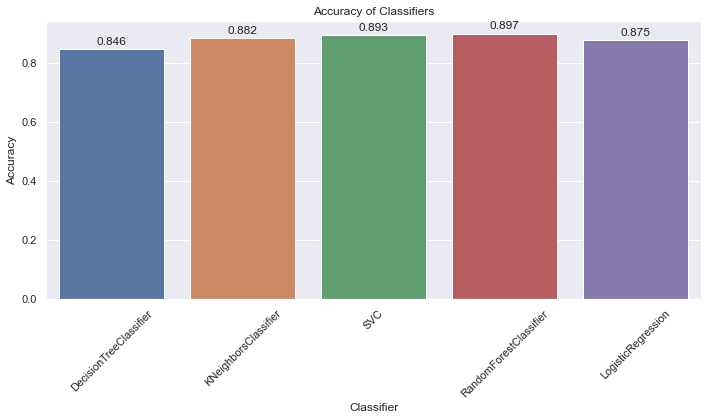

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier names
x = ['DecisionTreeClassifier', 'KNeighborsClassifier', 'SVC', 'RandomForestClassifier', 'LogisticRegression']

# Corresponding accuracies
y = [accuracydr, accuracyknn, accuracyds, accuracydRF, lr_score]

# Plotting the bar plot with values on top
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=x, y=y)
# Displaying the values on top of the bars
for i, v in enumerate(y):
    ax.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classifiers')
plt.tight_layout()
plt.show()

### Random Forest Giving the high Accracy 

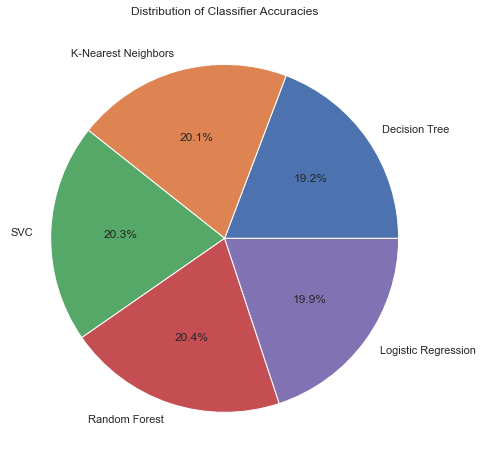

In [49]:
# Labels for the pie chart
labels = ['Decision Tree', 'K-Nearest Neighbors', 'SVC', 'Random Forest', 'Logistic Regression']

# Sizes or accuracies for each classifier
sizes = [accuracydr, accuracyknn, accuracyds, accuracydRF, lr_score]

# Plotting the pie chart with percentage labels
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Classifier Accuracies')
plt.show()
